# Importing the breast cancer data 

In [2]:
from google.colab import files 
uploaded = files.upload ()

Saving data_cancer.csv to data_cancer.csv


In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import io 

# read the data through pandas

In [6]:
data = pd.read_csv (io.StringIO(uploaded["data_cancer.csv"].decode ("utf-8")))

In [7]:
print (data.head())

         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]


# cleaning the unnecessary data 

In [8]:
del data["Unnamed: 32"]

In [9]:
print (data.head())

         id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]


# counting the value in diagnosis column 
malignant and baligin 

Balognin 357
Malignin 212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


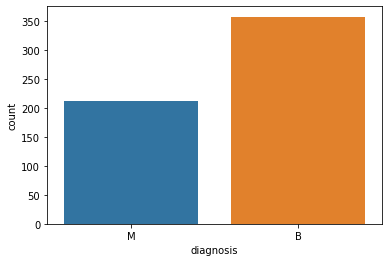

In [13]:
ax = sns.countplot(data["diagnosis"], Label = "Count")
B,M = data["diagnosis"].value_counts()
print ("Baligin", B)
print ("Malignant", M)

# making the two variables (dependent and independent )
x = Independent
y = dependent

In [11]:
x = data.iloc[:, 2:]
y = data.iloc[:,1]

# making the labels of dependent variable and transform the data in binary form i.e 0 & 1

In [14]:
from sklearn.preprocessing import LabelEncoder
y_labelencode = LabelEncoder()
y = y_labelencode.fit_transform(y)

In [15]:
print (y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

# spliting the data into train and test 

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
scalar_std = StandardScaler()
x_test = scalar_std.fit_transform (x_test)
x_train = scalar_std.fit_transform(x_train)

# import the keras model and layers 

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# making the models layers 
# for hidden layer we have use the relu activation function 
# for output layer we use the activation fucntion sigmoid

In [19]:
model = Sequential()
model.add(Dense (30, activation = "relu"))
model.add(Dense (30, activation = "relu"))
model.add(Dense (1, activation = "sigmoid"))


# use the compiler 

In [20]:
model.compile (optimizer = "rmsprop",
               loss = "binary_crossentropy",
               metrics = ["acc"])

# now finally we have reached to train our model 

In [21]:
history = model.fit (x_train, y_train, 
                     batch_size = 200, 
                     epochs = 25)

Epoch 1/25
2/2 [==============================] - 1s 9ms/step - loss: 0.5870 - acc: 0.7337
Epoch 2/25
2/2 [==============================] - 0s 7ms/step - loss: 0.4799 - acc: 0.8266
Epoch 3/25
2/2 [==============================] - 0s 7ms/step - loss: 0.4234 - acc: 0.8668
Epoch 4/25
2/2 [==============================] - 0s 6ms/step - loss: 0.3838 - acc: 0.8920
Epoch 5/25
2/2 [==============================] - 0s 7ms/step - loss: 0.3520 - acc: 0.9171
Epoch 6/25
2/2 [==============================] - 0s 6ms/step - loss: 0.3258 - acc: 0.9296
Epoch 7/25
2/2 [==============================] - 0s 7ms/step - loss: 0.3033 - acc: 0.9322
Epoch 8/25
2/2 [==============================] - 0s 5ms/step - loss: 0.2837 - acc: 0.9372
Epoch 9/25
2/2 [==============================] - 0s 6ms/step - loss: 0.2659 - acc: 0.9397
Epoch 10/25
2/2 [==============================] - 0s 7ms/step - loss: 0.2502 - acc: 0.9422
Epoch 11/25
2/2 [==============================] - 0s 6ms/step - loss: 0.2357 - acc: 0.94

In [22]:
y_predict = model.predict(x_test)
y_predict = (y_predict > 0.5)
print (y_predict)

[[ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predict)



In [24]:
print (conf_matrix)

[[103   5]
 [  4  59]]


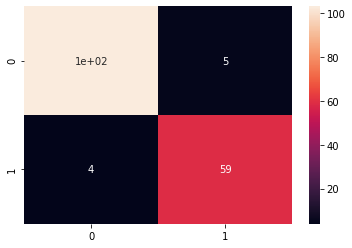

In [25]:
sns.heatmap(conf_matrix, annot=True)